In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Visualize the shape of each dataset 
a = pd.read_csv('pylidc.csv', index_col=False)
b = pd.read_csv('rad.csv', index_col=False)
print(a.shape)
print(b.shape)

(4218, 16)
(4696, 1599)


C:\Users\anton\AppData\Local\Temp\ipykernel_2724\3739568341.py:3: DtypeWarning: Columns (38,39,40,41,47) have mixed types. Specify dtype option on import or set low_memory=False.
  b = pd.read_csv('rad.csv', index_col=False)


In [3]:
# Merge the datasets on their ID
df = b.merge(a, left_on='id', right_on='Id')
df = df.drop(columns=['Id'])
df.shape

(2948, 1614)

In [4]:
# Figuring out the amount of columns that contain Null values
count = 0
for c in df.columns:
    n = df[c].isnull().sum()
    if n > 0: 
        count +=1

print(count)

287


In [5]:
# Removing columns with missing values and useless information 
count = 0
df = df.drop(columns = 'diagnostics_Mask-original_Hash')
count += 1

# Removing all the columns thar are constant in the dataframe
for col in df.columns:
    if len(df[col].unique()) == 1:
        df = df.drop(columns=col)
        count += 1

# Removing all the columns with null values
for col in df.columns:
    nul = df[col].isnull().sum()
    if nul > 0:
        df = df.drop(columns=[col])
        count += 1

print(df.shape)
print(f"Total number of columns deleted: {count}")

(2948, 1313)
Total number of columns deleted: 301


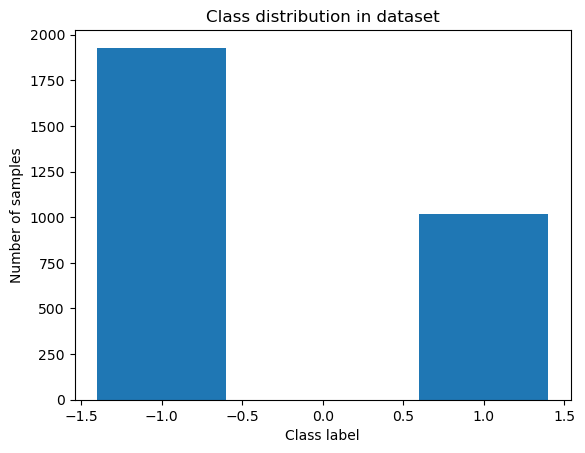

[-1  1] [1929 1019]


In [6]:
# Plotting the label class
unique_labels, counts = np.unique(df.malignancy, return_counts=True)
plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

print(unique_labels, counts)

In [7]:
# Number of individual patients in the training set
len(df['patient_id'].unique())


435

In [8]:
# Correlation with the target variable
cor = df.corr()['malignancy'] 

# Removing the columns with corr lower than the 0.2
columns_to_remove = cor[(abs(cor) <= 0.2)].index
df_filtered = df.drop(columns = columns_to_remove)

# Save the filtered DataFrame to a new CSV file
#df_filtered.to_csv('final_data.csv', sep=',', index=False)

C:\Users\anton\AppData\Local\Temp\ipykernel_2724\1515231457.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()['malignancy']


In [9]:
df.dtypes.value_counts()
# We need to be careful while working with strings/object types

float64    1281
object       19
int64        13
dtype: int64

In [10]:
g = df.columns.to_series().groupby(df.dtypes).groups

# finding out all the columns that are an object type
for key, value in g.items():
    if key == 'object':
        print(value)

Index(['id', 'diagnostics_Mask-original_Spacing',
       'diagnostics_Mask-original_Size',
       'diagnostics_Mask-original_BoundingBox',
       'diagnostics_Mask-original_CenterOfMassIndex',
       'diagnostics_Mask-original_CenterOfMass',
       'diagnostics_Image-interpolated_Spacing',
       'diagnostics_Image-interpolated_Size',
       'diagnostics_Mask-interpolated_Spacing',
       'diagnostics_Mask-interpolated_Size',
       'diagnostics_Mask-interpolated_BoundingBox',
       'diagnostics_Mask-interpolated_CenterOfMassIndex',
       'diagnostics_Mask-interpolated_CenterOfMass',
       'original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_MinorAxisLength', 'patient_id'],
      dtype='object')


In [11]:
object_columns = ['diagnostics_Mask-original_Spacing',
       'diagnostics_Mask-original_Size',
       'diagnostics_Mask-original_BoundingBox',
       'diagnostics_Mask-original_CenterOfMassIndex',
       'diagnostics_Mask-original_CenterOfMass',
       'diagnostics_Image-interpolated_Spacing',
       'diagnostics_Image-interpolated_Size',
       'diagnostics_Mask-interpolated_Spacing',
       'diagnostics_Mask-interpolated_Size',
       'diagnostics_Mask-interpolated_BoundingBox',
       'diagnostics_Mask-interpolated_CenterOfMassIndex',
       'diagnostics_Mask-interpolated_CenterOfMass',
       'original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_MinorAxisLength']

object = df[object_columns]
new_df = df.drop(columns = object_columns)

In [12]:
normalized = df[object_columns]

# Tranforming string type columns '(x, y, z)' in separate columns x, y and z
for j in range(0, 12):
    col = normalized[object_columns[j]]

   # Count the commas in the string
    comma_count = col.iloc[0].count(',')

    # Defining the names for the new cloumns  
    list = []
    for i in range(comma_count + 1):
        name = object_columns[j] + "_" + str(i)
        list.append(name)

    for k in range(len(normalized)):
        s = col.iloc[k]

        # Split the 'coordinates' column into separate columns
        s = s.strip('()')
        values = [float(idx) for idx in s.split(', ')]
        
        for k1 in range(len(list)):
            normalized[list[k1]] = values[k1]

    normalized = normalized.drop(columns= object_columns[j])

# Dropping other comlumns with questionable data 
normalized = normalized.drop(columns= normalized.columns[0:5])

normalized.head()

C:\Users\anton\AppData\Local\Temp\ipykernel_2724\927926733.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized[list[k1]] = values[k1]
C:\Users\anton\AppData\Local\Temp\ipykernel_2724\927926733.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized[list[k1]] = values[k1]
C:\Users\anton\AppData\Local\Temp\ipykernel_2724\927926733.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,diagnostics_Mask-original_Spacing_0,diagnostics_Mask-original_Spacing_1,diagnostics_Mask-original_Spacing_2,diagnostics_Mask-original_Size_0,diagnostics_Mask-original_Size_1,diagnostics_Mask-original_Size_2,diagnostics_Mask-original_BoundingBox_0,diagnostics_Mask-original_BoundingBox_1,diagnostics_Mask-original_BoundingBox_2,diagnostics_Mask-original_BoundingBox_3,...,diagnostics_Mask-interpolated_BoundingBox_2,diagnostics_Mask-interpolated_BoundingBox_3,diagnostics_Mask-interpolated_BoundingBox_4,diagnostics_Mask-interpolated_BoundingBox_5,diagnostics_Mask-interpolated_CenterOfMassIndex_0,diagnostics_Mask-interpolated_CenterOfMassIndex_1,diagnostics_Mask-interpolated_CenterOfMassIndex_2,diagnostics_Mask-interpolated_CenterOfMass_0,diagnostics_Mask-interpolated_CenterOfMass_1,diagnostics_Mask-interpolated_CenterOfMass_2
0,0.859375,0.859375,2.5,512.0,512.0,8.0,390.0,284.0,0.0,32.0,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362
1,0.859375,0.859375,2.5,512.0,512.0,8.0,390.0,284.0,0.0,32.0,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362
2,0.859375,0.859375,2.5,512.0,512.0,8.0,390.0,284.0,0.0,32.0,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362
3,0.859375,0.859375,2.5,512.0,512.0,8.0,390.0,284.0,0.0,32.0,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362
4,0.859375,0.859375,2.5,512.0,512.0,8.0,390.0,284.0,0.0,32.0,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362


In [13]:
final = pd.concat([new_df, normalized], axis=1)
print(final.dtypes.value_counts())
print(final.shape)
# These 2 objects types corresponde to the id and the patient_id

float64    1323
int64        13
object        2
dtype: int64
(2948, 1338)


In [14]:
# Removing all the columns with correlation lower that 0.05
index = final[['id', 'patient_id']]
features = final.drop(columns=['id', 'patient_id'])

# Calculate the correlation between features and the target variable
correlations = features.corr()['malignancy']

# Identify features with correlation less than 0.05
features_to_remove = correlations[abs(correlations) < 0.05].index

# Remove the identified features from the DataFrame
df_filtered = features.drop(columns=features_to_remove)

df_filtered.shape


(2948, 1131)

In [15]:
new_final = pd.concat([index, features], axis=1) 

In [16]:
new_final.to_csv('final.csv', sep=',', index=False)